In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


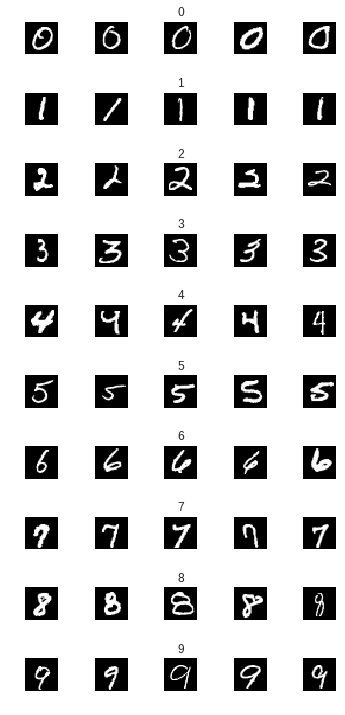

In [4]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


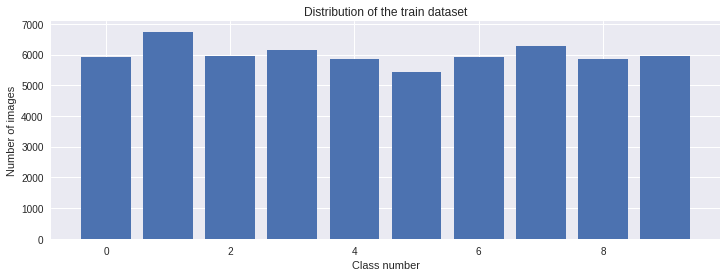

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255


In [0]:
# define the leNet_model function
def leNet_model():
    model = Sequential()
    # adding the convolution layer
    # (1) number of epochs
    # (2) kernel size
    # (3) image size 28 px x 28 px with 1 channel aka 1 color
    # (4) activation function type
    model.add(Conv2D(
        30, 
        (5, 5), 
        input_shape=(28, 28, 1), 
        activation="relu"
    ))
    
    # adding the pooling layer
    # for details on what maxpooling does...
    # see: https://github.com/steven4354/cifar-10-img-classifier/blob/master/cifar_image_classifier.ipynb
    model.add(MaxPooling2D(
        pool_size=(2,2)
    ))
    
    model.add(Conv2D(15, (3,3), activation="relu"))
    
    model.add(MaxPooling2D(
        pool_size=(2,2)
    ))
    
    
    # flatten the pics
    # each img will now be an 1D array
    model.add(Flatten())
    
    # (1) is the number
    model.add(Dense(500, activation="relu"))
    
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [9]:
model = leNet_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dens

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 117us/step - loss: 0.2296 - acc: 0.9305 - val_loss: 0.0492 - val_acc: 0.9852
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0518 - acc: 0.9839 - val_loss: 0.0415 - val_acc: 0.9873
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0366 - acc: 0.9884 - val_loss: 0.0452 - val_acc: 0.9883
Epoch 4/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0310 - acc: 0.9901 - val_loss: 0.0378 - val_acc: 0.9897
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0513 - val_acc: 0.9848
Epoch 6/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0205 - acc: 0.9932 - val_loss: 0.0466 - val_acc: 0.9877
Epoch 7/10
54000/54000 [==============================] - 2s 35us/step - loss: 0

Text(0.5, 0, 'epoch')

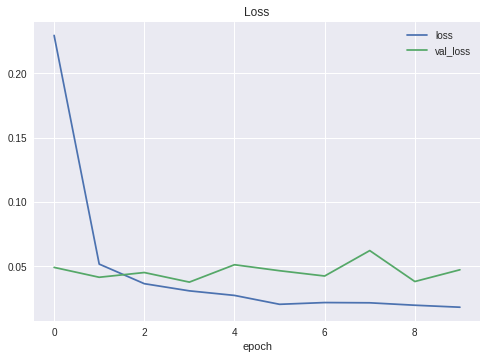

In [11]:
# copied and pasted from mnist repo to check accuraccy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

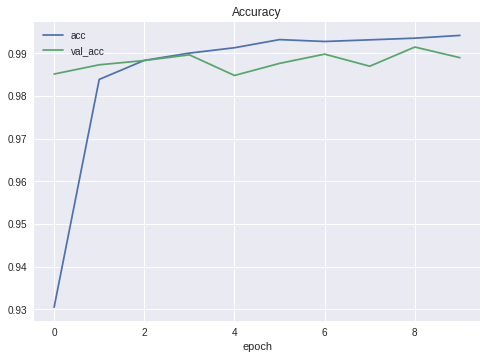

In [12]:
# copied and pasted from mnist repo to check accuraccy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')